In [ ]:
# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [ ]:
pip install kdtree

In [10]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import nearest_city

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)
             

## Generate Cities List

In [14]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

590

In [15]:
cities[:5]

['esperance', 'port macquarie', 'manokwari', 'butaritari', 'geraldton']

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [17]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

In [18]:
# set up lists to hold reponse info
city_list = []
lat = []
lon = []
temp = []
hum = []
cloud = []
wind_speed = []
date = []
country = []

# Loop through the list of cities and perform a request for data on each
n = 1
for city in cities:
    response = requests.get(query_url + city).json()
    try:
        if response['name'].lower() == city.lower():
            city_list.append(city)
            lat.append(response['coord']['lat'])
            lon.append(response['coord']['lon'])
            temp.append(response['main']['temp_max'])
            hum.append(response['main']['humidity'])
            cloud.append(response['clouds']['all'])
            wind_speed.append(response['wind']['speed'])
            date.append(response['dt'])
            country.append(response['sys']['country'])
            print('Processing Record', n, '|',city)
            n = n+1
    except:
        print('City not found. Skipping...')

Processing Record 1 | esperance
Processing Record 2 | port macquarie
Processing Record 3 | manokwari
Processing Record 4 | butaritari
Processing Record 5 | geraldton
Processing Record 6 | hobart
Processing Record 7 | dunedin
Processing Record 8 | atuona
Processing Record 9 | hithadhoo
Processing Record 10 | westminster
Processing Record 11 | hermanus
Processing Record 12 | provideniya
Processing Record 13 | albany
Processing Record 14 | broome
Processing Record 15 | pacifica
Processing Record 16 | jamestown
Processing Record 17 | wonthaggi
Processing Record 18 | katsuura
Processing Record 19 | ust-tsilma
Processing Record 20 | sitka
Processing Record 21 | barrow
Processing Record 22 | port hedland
Processing Record 23 | khatanga
Processing Record 24 | nouadhibou
Processing Record 25 | vaitape
Processing Record 26 | kaitangata
Processing Record 27 | verkhnevilyuysk
City not found. Skipping...
Processing Record 28 | rikitea
Processing Record 29 | ilulissat
Processing Record 30 | pizarro


Processing Record 231 | talaya
Processing Record 232 | north bend
Processing Record 233 | mehamn
Processing Record 234 | itarema
Processing Record 235 | cobija
Processing Record 236 | ibotirama
Processing Record 237 | richards bay
Processing Record 238 | port hardy
Processing Record 239 | brae
Processing Record 240 | fortuna
City not found. Skipping...
Processing Record 241 | nishihara
Processing Record 242 | dakar
Processing Record 243 | letlhakane
Processing Record 244 | charlestown
Processing Record 245 | williams lake
Processing Record 246 | mandalgovi
Processing Record 247 | mikhaylovskoye
City not found. Skipping...
Processing Record 248 | druzhba
Processing Record 249 | bambanglipuro
Processing Record 250 | entebbe
Processing Record 251 | oistins
Processing Record 252 | tevriz
Processing Record 253 | terrace
City not found. Skipping...
Processing Record 254 | jalu
Processing Record 255 | norman wells
Processing Record 256 | lima
Processing Record 257 | yenagoa
Processing Record 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [19]:
api_data_dict = {'City': city_list,
                 'Lat': lat,
                 'Lng': lon,
                 'Max Temp': temp,
                 'Humidity': hum,
                 'Cloudiness': cloud,
                 'Wind Speed': wind_speed,
                 'Country': country,
                 'Date': date
                }
api_data_df = pd.DataFrame(api_data_dict)
api_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,esperance,-33.8667,121.9000,18.00,63,75,4.63,AU,1612999628
1,port macquarie,-31.4333,152.9167,23.89,60,72,2.06,AU,1612999629
2,manokwari,-0.8667,134.0833,27.21,77,90,1.68,ID,1612999630
3,butaritari,3.0707,172.7902,27.58,76,99,7.38,KI,1612999630
4,geraldton,-28.7667,114.6000,15.00,82,0,4.63,AU,1612999631


In [20]:
api_data_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,4.520000e+02
mean,18.578981,16.827695,9.459314,72.438053,52.137168,3.688673,1.613000e+09
std,34.599914,92.897110,18.497860,19.453923,37.776196,2.664575,1.695090e+02
min,-54.800000,-175.200000,-34.000000,1.000000,0.000000,0.110000,1.612999e+09
25%,-11.209800,-67.364875,-4.110000,63.000000,15.750000,1.570000,1.613000e+09
50%,20.475450,19.100600,17.900000,78.000000,56.000000,3.090000,1.613000e+09
75%,48.695750,101.828075,24.430000,87.000000,90.000000,4.980000,1.613000e+09
max,78.218600,178.416700,34.000000,100.000000,100.000000,18.010000,1.613000e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [21]:
#  Get the indices of cities that have humidity over 100%.
api_data_df.loc[api_data_df['Humidity']>100,:]

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

### There are no records with Humidity >100% in the data we got from API.

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

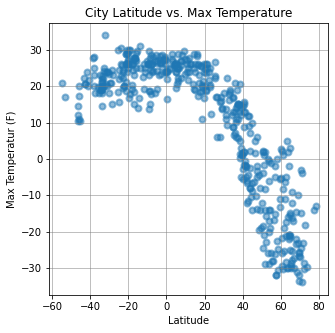

In [28]:
fig = plt.figure(figsize=(5,5))
plt.scatter(api_data_df['Lat'],api_data_df['Max Temp'],marker='o',alpha=0.5,linewidths=2,)
plt.title('City Latitude vs. Max Temperature')
plt.xlabel('Latitude')
plt.ylabel('Max Temperatur (F)')
plt.grid(linewidth='0.5', color='grey')
plt.show()
fig.savefig('lat_vs_temp.png')

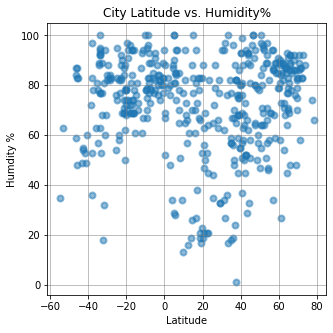

#### The above scatter chart shows as the Latitude of the city increases, Temperature decreases.

## Latitude vs. Humidity Plot

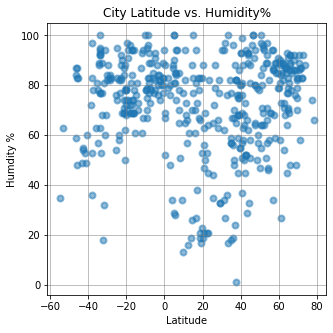

In [30]:
fig = plt.figure(figsize=(5,5))
plt.scatter(api_data_df['Lat'],api_data_df['Humidity'],marker='o',alpha=0.5,linewidths=2,)
plt.title('City Latitude vs. Humidity%')
plt.xlabel('Latitude')
plt.ylabel('Humdity %')
plt.grid(linewidth='0.5', color='grey')
plt.show()
fig.savefig('lat_vs_hum.png')

#### From the above scatter chart we can observe that there is no direct relationship between Latitude of city and Humidity %

## Latitude vs. Cloudiness Plot

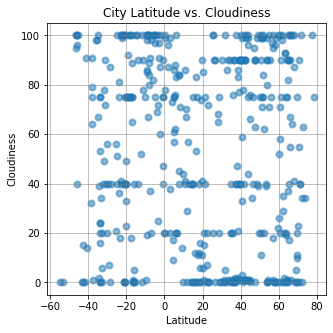

In [31]:
fig = plt.figure(figsize=(5,5))
plt.scatter(api_data_df['Lat'],api_data_df['Cloudiness'],marker='o',alpha=0.5,linewidths=2,)
plt.title('City Latitude vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.grid(linewidth='0.5', color='grey')
plt.show()
fig.savefig('lat_vs_Cloud.png')

#### From the above scatter chart we can observe that there is no direct relationship between Latitude of city and Cloudiness

## Latitude vs. Wind Speed Plot

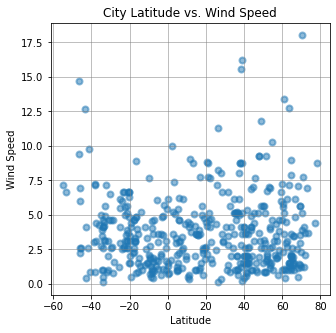

In [32]:
fig = plt.figure(figsize=(5,5))
plt.scatter(api_data_df['Lat'],api_data_df['Wind Speed'],marker='o',alpha=0.5,linewidths=2,)
plt.title('City Latitude vs. Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.grid(linewidth='0.5', color='grey')
plt.show()
fig.savefig('lat_vs_Wind.png')

#### From the above scatter chart we can observe that for Latitude of city between -60 t0 80 and Wind Speed is between 0 (min) to 20 (max).

## Linear Regression

In [33]:
N_Hemi_DF = api_data_df.loc[api_data_df['Lat']>=0,:]
N_Hemi_DF.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
3,butaritari,3.0707,172.7902,27.58,76,99,7.38,KI,1612999630
9,westminster,39.8367,-105.0372,1.67,55,40,2.06,US,1612999634
11,provideniya,64.3833,-173.3000,-22.00,64,0,9.00,RU,1612999591
12,albany,42.6001,-73.9662,-4.44,52,99,1.86,US,1612999637
13,broome,42.2506,-75.8330,-6.00,45,90,1.54,US,1612999638


In [34]:
S_Hemi_DF = api_data_df.loc[api_data_df['Lat']<0,:]
S_Hemi_DF.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,esperance,-33.8667,121.9000,18.00,63,75,4.63,AU,1612999628
1,port macquarie,-31.4333,152.9167,23.89,60,72,2.06,AU,1612999629
2,manokwari,-0.8667,134.0833,27.21,77,90,1.68,ID,1612999630
4,geraldton,-28.7667,114.6000,15.00,82,0,4.63,AU,1612999631
5,hobart,-42.8794,147.3294,20.56,55,0,4.12,AU,1612999632


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.8884898851268894


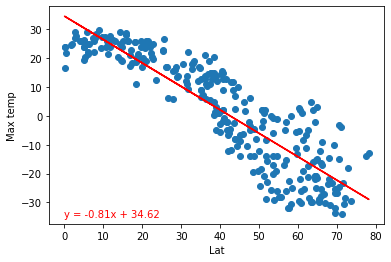

In [35]:
x_values = N_Hemi_DF['Lat']
y_values = N_Hemi_DF['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,-35),fontsize=10,color="red")
plt.xlabel('Lat')
plt.ylabel('Max temp')
print("The r-value is:",rvalue)
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.4420277656980204


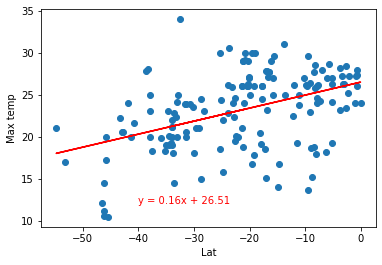

In [36]:
x_values = S_Hemi_DF['Lat']
y_values = S_Hemi_DF['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-40,12),fontsize=10,color="red")
plt.xlabel('Lat')
plt.ylabel('Max temp')
print("The r-value is:",rvalue)
plt.show()

#### From the above two scatter plots for Northern & Southern Hemisphere, we can observe that in case of Northern as the Latitude increases Temperature decreases but in case of Southern as the Latitude increases Temperature also increases.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.2570422285938573


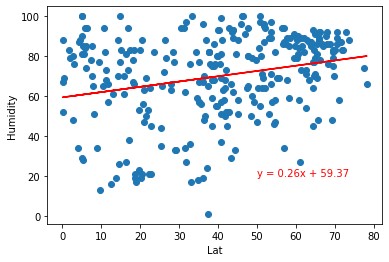

In [37]:
x_values = N_Hemi_DF['Lat']
y_values = N_Hemi_DF['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,20),fontsize=10,color="red")
plt.xlabel('Lat')
plt.ylabel('Humidity')
print("The r-value is:",rvalue)
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.3433256261332504


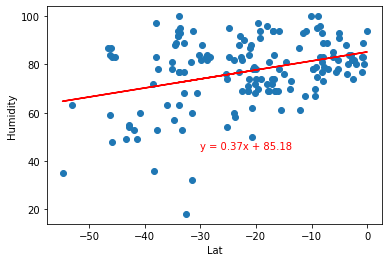

In [38]:
x_values = S_Hemi_DF['Lat']
y_values = S_Hemi_DF['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,45),fontsize=10,color="red")
plt.xlabel('Lat')
plt.ylabel('Humidity')
print("The r-value is:",rvalue)
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression